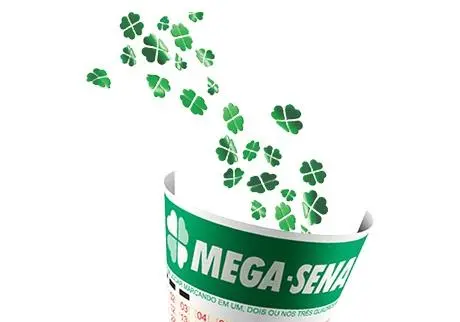

# Title

In [13]:
# Análise de dados do concurso da mega-sena
# ---
# fonte de dados: http://www.loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/!ut/p/a1/04_Sj9CPykssy0xPLMnMz0vMAfGjzOLNDH0MPAzcDbwMPI0sDBxNXAOMwrzCjA0sjIEKIoEKnN0dPUzMfQwMDEwsjAw8XZw8XMwtfQ0MPM2I02-AAzgaENIfrh-FqsQ9wNnUwNHfxcnSwBgIDUyhCvA5EawAjxsKckMjDDI9FQE-F4ca/dl5/d5/L2dBISEvZ0FBIS9nQSEh/pw/Z7_HGK818G0K8DBC0QPVN93KQ10G1/res/id=historicoHTML/c=cacheLevelPage/=/
# ---
# Obs: A escrita correta da palavra é megassena,
# seguindo o acordo ortográfico vigente, mas em virtude de se tratar de marca registrada
# a expressão "mega-sena" é considerada exceção à regra.

# Head

In [1]:
# Objetivo: Antes de mais nada, praticar a linguagem Python
# e quem sabe com sorte ganhar o prêmio! :-)
# Investigar as ocorrências de números aleatórios,
# porque trata-se de evento independente,
# e tentar encontrar padrões nas séries!
# by geanclm in 20/02/2022 at 16:43h

# Local files

In [1]:
pwd

'C:\\Users\\geanc\\Downloads\\DATA SCIENCE\\python_project_3'

In [3]:
# arquivos utilizados
!dir *.csv, img\*.webp

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 2656-7D0D

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\python_project_3

25/02/2022  18:30           417.872 5f3J2qZf.csv
               1 arquivo(s)        417.872 bytes

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\python_project_3\img

23/02/2022  13:02             9.146 mg.webp
               1 arquivo(s)          9.146 bytes
               0 pasta(s)   627.773.517.824 bytes dispon¡veis


# Import libs

In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# biblioteca para visualizar os dados faltantes do data frame
# Obs: pip install missingno
import missingno

import numpy as np

# Load Data

In [95]:
# Importar arquivo .cvs obtido a partir do download e conversão do .htm 
df = pd.read_csv('5f3J2qZf.csv', sep=';' ,encoding='utf-8',
                 decimal=',', thousands='.', parse_dates=['Data do Sorteio'])

In [3]:
# df_htm = pd.read_html('Resultado da Mega Sena por ordem de sorteio.htm', encoding='utf-8', header=0)[0]

# Data visualization

In [6]:
df.shape

(5090, 23)

In [7]:
df.columns

Index(['Concurso', 'Local', 'Data do Sorteio', 'Coluna 1', 'Coluna 2',
       'Coluna 3', 'Coluna 4', 'Coluna 5', 'Coluna 6', 'Ganhadores Faixa 1',
       'Ganhadores Faixa 2', 'Ganhadores Faixa 3', 'Rateio Faixa 1',
       'Rateio Faixa 2', 'Rateio Faixa 3', 'Cidade', 'Unnamed: 16',
       'Valor Arrecadado', 'Estimativa para o próximo concurso',
       'Valor Acumulado Próximo Concurso', 'Acumulado', 'Sorteio Especial',
       'Observação'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090 entries, 0 to 5089
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Concurso                            2457 non-null   float64       
 1   Local                               2368 non-null   object        
 2   Data do Sorteio                     2457 non-null   datetime64[ns]
 3   Coluna 1                            2457 non-null   float64       
 4   Coluna 2                            2457 non-null   float64       
 5   Coluna 3                            2457 non-null   float64       
 6   Coluna 4                            2457 non-null   float64       
 7   Coluna 5                            2457 non-null   float64       
 8   Coluna 6                            2457 non-null   float64       
 9   Ganhadores Faixa 1                  2457 non-null   float64       
 10  Ganhadores Faixa 2      

In [9]:
# quantas vezes a Mega-sena acumulou
df.Acumulado.value_counts(normalize=False)

SIM    1896
NAO     561
Name: Acumulado, dtype: int64

In [10]:
df['Rateio Faixa 1'].sum

<bound method Series.sum of 0              NaN
1             0.00
2              NaN
3       2307162.23
4              NaN
           ...    
5085          0.00
5086           NaN
5087          0.00
5088           NaN
5089          0.00
Name: Rateio Faixa 1, Length: 5090, dtype: float64>

In [14]:
df.tail(5).T

,5085,5086,5087,5088,5089
Concurso,2455,NaT,2456,NaT,2457
Local,"SÃƒO PAULO, SP",NaT,"SÃƒO PAULO, SP",NaT,"SÃƒO PAULO, SP"
Data do Sorteio,2022-02-19 00:00:00,NaT,2022-02-22 00:00:00,NaT,2022-02-24 00:00:00
Coluna 1,21,NaT,28,NaT,10
Coluna 2,38,NaT,34,NaT,19
Coluna 3,50,NaT,40,NaT,46
Coluna 4,53,NaT,41,NaT,47
Coluna 5,56,NaT,52,NaT,49
Coluna 6,59,NaT,55,NaT,50
Ganhadores Faixa 1,0,NaT,0,NaT,0


In [114]:
df.sample(5)

,Concurso,Local,Data do Sorteio,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,...,Rateio Faixa 2,Rateio Faixa 3,Cidade,Unnamed: 16,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso,Acumulado,Sorteio Especial,Observação
4505,2173,"SÃƒO PAULO, SP",2019-07-27,2,9,42,44,48,50,0,...,35893,673,NaN,NaN,31749879,10000000,59703904,SIM,SIM,NaN
2217,1107,"PARAUAPEBAS, PA",2009-09-09,3,9,20,36,53,54,0,...,14820,286,NaN,NaN,21516050,7000000,35412577,SIM,SIM,NaN
4544,nan,NaN,NaT,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN
990,nan,NaN,NaT,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN
4145,2017,"CAMPO BELO, MG",2018-02-24,2,10,11,24,38,56,0,...,16317,468,NaN,NaN,34810982,11000000,11861675,SIM,SIM,NaN


In [20]:
# local onde teve maior número de sorteios da Mega-sena
df['Local'].mode()[0]

'SÃƒO PAULO, SP'

In [16]:
df['Ganhadores Faixa 1'].mean()

0.3463573463573464

In [17]:
df['Ganhadores Faixa 1'].median()

0.0

In [96]:
df.mode()

,Concurso,Local,Data do Sorteio,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,...,Rateio Faixa 2,Rateio Faixa 3,Cidade,Unnamed: 16,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso,Acumulado,Sorteio Especial,Observação
0,1.0,"SÃƒO PAULO, SP",1996-01-04,1.0,16.0,28.0,37.0,42.0,60.0,0.0,...,122.53,159.45,SÃƒO PAULO,SP,0.0,0.0,0.0,SIM,SIM,SORTEIO REALIZADO EM ESTÃšDIO DE TV.
1,2.0,NaN,1996-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,951.79,354.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,1996-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1024.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,1996-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1112.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,1996-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1400.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,2453.0,NaN,2022-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122896.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2453,2454.0,NaN,2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123443.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2454,2455.0,NaN,2022-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128304.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2455,2456.0,NaN,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,154808.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# quantidade de dados ausentes em cada atributo em ordem decrescente
df.isnull().sum().sort_values(ascending=False)

Cidade                                4578
Unnamed: 16                           4376
Observação                            4196
Local                                 2722
Ganhadores Faixa 1                    2633
Data do Sorteio                       2633
Coluna 1                              2633
Coluna 2                              2633
Coluna 3                              2633
Coluna 4                              2633
Coluna 5                              2633
Coluna 6                              2633
Ganhadores Faixa 3                    2633
Ganhadores Faixa 2                    2633
Sorteio Especial                      2633
Rateio Faixa 1                        2633
Rateio Faixa 2                        2633
Rateio Faixa 3                        2633
Valor Arrecadado                      2633
Estimativa para o próximo concurso    2633
Valor Acumulado Próximo Concurso      2633
Acumulado                             2633
Concurso                              2633
dtype: int6

In [22]:
pd.isnull(df)

,Concurso,Local,Data do Sorteio,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,...,Rateio Faixa 2,Rateio Faixa 3,Cidade,Unnamed: 16,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso,Acumulado,Sorteio Especial,Observação
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5085,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
5086,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5087,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
5088,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [23]:
df.isnull().sum()

Concurso                              2633
Local                                 2722
Data do Sorteio                       2633
Coluna 1                              2633
Coluna 2                              2633
Coluna 3                              2633
Coluna 4                              2633
Coluna 5                              2633
Coluna 6                              2633
Ganhadores Faixa 1                    2633
Ganhadores Faixa 2                    2633
Ganhadores Faixa 3                    2633
Rateio Faixa 1                        2633
Rateio Faixa 2                        2633
Rateio Faixa 3                        2633
Cidade                                4578
Unnamed: 16                           4376
Valor Arrecadado                      2633
Estimativa para o próximo concurso    2633
Valor Acumulado Próximo Concurso      2633
Acumulado                             2633
Sorteio Especial                      2633
Observação                            4196
dtype: int6

In [26]:
# quantidade de linhas e colunas originais da base de dados
df.shape

(5090, 23)

In [27]:
df.columns

Index(['Concurso', 'Local', 'Data do Sorteio', 'Coluna 1', 'Coluna 2',
       'Coluna 3', 'Coluna 4', 'Coluna 5', 'Coluna 6', 'Ganhadores Faixa 1',
       'Ganhadores Faixa 2', 'Ganhadores Faixa 3', 'Rateio Faixa 1',
       'Rateio Faixa 2', 'Rateio Faixa 3', 'Cidade', 'Unnamed: 16',
       'Valor Arrecadado', 'Estimativa para o próximo concurso',
       'Valor Acumulado Próximo Concurso', 'Acumulado', 'Sorteio Especial',
       'Observação'],
      dtype='object')

In [28]:
df.describe()

,Concurso,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,Ganhadores Faixa 2,Ganhadores Faixa 3,Rateio Faixa 1,Rateio Faixa 2,Rateio Faixa 3,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2.457000e+03,2457.000000,2457.000000,2.457000e+03,2.457000e+03,2.457000e+03
mean,1229.000000,8.618234,17.303622,26.310948,35.030525,43.509972,52.185592,0.346357,111.627595,7164.843712,4.978460e+06,26385.292841,457.266663,2.914530e+07,1.573398e+07,2.028469e+07
std,709.419129,7.002498,9.130110,9.988928,9.806531,9.022863,6.950716,1.328136,232.506473,10970.192495,1.578288e+07,17737.989881,299.300621,6.857417e+07,2.895163e+07,2.471779e+07
min,1.000000,1.000000,2.000000,3.000000,8.000000,11.000000,22.000000,0.000000,4.000000,683.000000,0.000000e+00,122.530000,69.550000,0.000000e+00,0.000000e+00,0.000000e+00
25%,615.000000,3.000000,10.000000,19.000000,28.000000,38.000000,49.000000,0.000000,47.000000,3663.000000,0.000000e+00,14012.810000,218.960000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1229.000000,7.000000,16.000000,26.000000,35.000000,44.000000,54.000000,0.000000,75.000000,5301.000000,0.000000e+00,21307.170000,358.770000,2.393380e+07,4.000000e+06,8.059636e+06
75%,1843.000000,12.000000,23.000000,33.000000,42.000000,51.000000,58.000000,0.000000,117.000000,7628.000000,0.000000e+00,34335.730000,643.750000,4.005667e+07,2.300000e+07,3.780227e+07
max,2457.000000,50.000000,51.000000,56.000000,58.000000,59.000000,60.000000,52.000000,7688.000000,303857.000000,2.894209e+08,169338.140000,1724.830000,1.510257e+09,3.700000e+08,1.390996e+08


In [29]:
df.median().values

<ipython-input-29-544092b76fee>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median().values


array([1.22900000e+03, 7.00000000e+00, 1.60000000e+01, 2.60000000e+01,
       3.50000000e+01, 4.40000000e+01, 5.40000000e+01, 0.00000000e+00,
       7.50000000e+01, 5.30100000e+03, 0.00000000e+00, 2.13071700e+04,
       3.58770000e+02, 2.39337960e+07, 4.00000000e+06, 8.05963647e+06])

In [97]:
# Usando isna() para selecionar todas as linhas com NaN do dataFrame
df[df.isna().any(axis=1)]

,Concurso,Local,Data do Sorteio,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,...,Rateio Faixa 2,Rateio Faixa 3,Cidade,Unnamed: 16,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso,Acumulado,Sorteio Especial,Observação
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,"BrasÃ­lia, DF",1996-11-03,4.0,5.0,30.0,33.0,41.0,52.0,0.0,...,39158.92,330.21,NaN,NaN,0.0,0.0,0.00,SIM,SIM,NaN
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,"Belo Horizonte, MG",1996-03-18,9.0,37.0,39.0,41.0,43.0,49.0,1.0,...,14424.02,208.91,NaN,PR,0.0,0.0,0.00,NAO,SIM,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5085,2455.0,"SÃƒO PAULO, SP",2022-02-19,21.0,38.0,50.0,53.0,56.0,59.0,0.0,...,76582.32,1263.11,NaN,NaN,58444069.5,37000000.0,9572791.60,SIM,SIM,NaN
5086,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5087,2456.0,"SÃƒO PAULO, SP",2022-02-22,28.0,34.0,40.0,41.0,52.0,55.0,0.0,...,81253.19,1394.17,NaN,NaN,43687921.5,40000000.0,10235646.61,SIM,SIM,NaN
5088,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# df.notna()

In [36]:
# Usando isna() para selecionar todas as linhas com NaN em uma coluna específica
# Número de concursos da Mega-sena sem a informação do local de sorteio
df[df['Local'].isna()]

,Concurso,Local,Data do Sorteio,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,...,Rateio Faixa 2,Rateio Faixa 3,Cidade,Unnamed: 16,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso,Acumulado,Sorteio Especial,Observação
23,24.0,NaN,1996-08-19,1.0,8.0,14.0,28.0,33.0,43.0,1.0,...,7897.31,132.93,NaN,NaN,0.0,0.0,0.0,NAO,SIM,NaN
91,92.0,NaN,1997-07-12,1.0,3.0,5.0,23.0,24.0,51.0,0.0,...,9792.64,132.56,NaN,NaN,0.0,0.0,0.0,SIM,SIM,NaN
92,93.0,NaN,1997-12-14,2.0,22.0,28.0,31.0,36.0,53.0,0.0,...,12369.31,198.44,NaN,NaN,0.0,0.0,0.0,SIM,SIM,NaN
93,94.0,NaN,1997-12-21,8.0,18.0,28.0,51.0,52.0,55.0,0.0,...,31457.49,376.26,NaN,NaN,0.0,0.0,0.0,SIM,SIM,NaN
94,95.0,NaN,1997-12-28,6.0,40.0,45.0,46.0,50.0,60.0,0.0,...,30807.89,309.58,NaN,NaN,0.0,0.0,0.0,SIM,SIM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GOIANIA,GO,NaN,NaN,NaN,NaN,NaN,NaN
2599,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,BENEDITO LEITE,MA,NaN,NaN,NaN,NaN,NaN,NaN
2600,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,BORBOREMA,SP,NaN,NaN,NaN,NaN,NaN,NaN
2614,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,CAMPINAS,SP,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.isna()

,Concurso,Local,Data do Sorteio,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,...,Rateio Faixa 2,Rateio Faixa 3,Cidade,Unnamed: 16,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso,Acumulado,Sorteio Especial,Observação
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5085,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
5086,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5087,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
5088,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

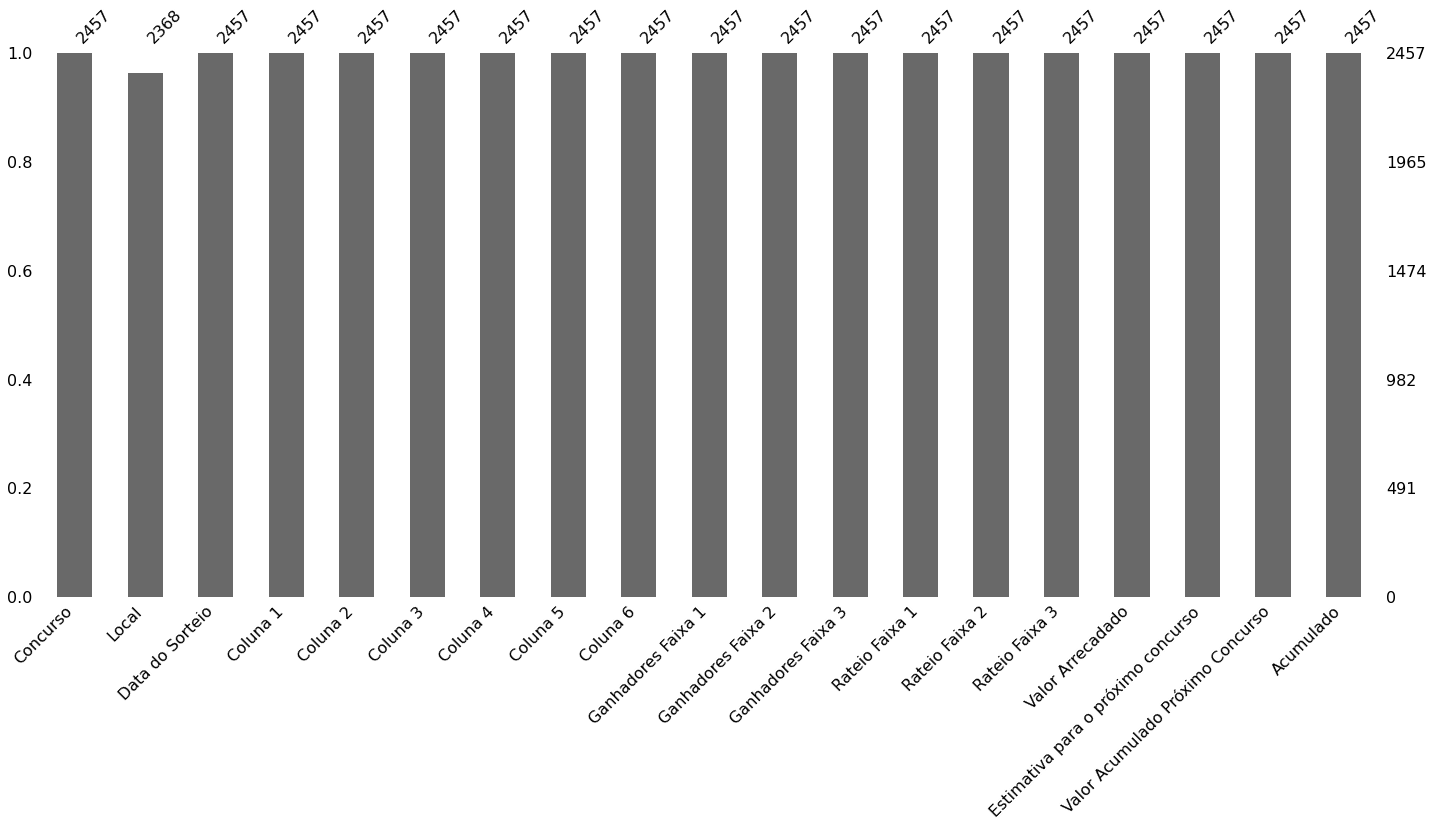

In [66]:
# Visualizar através do gráfico os campos com dados ausentes
missingno.bar(df)

<AxesSubplot:>

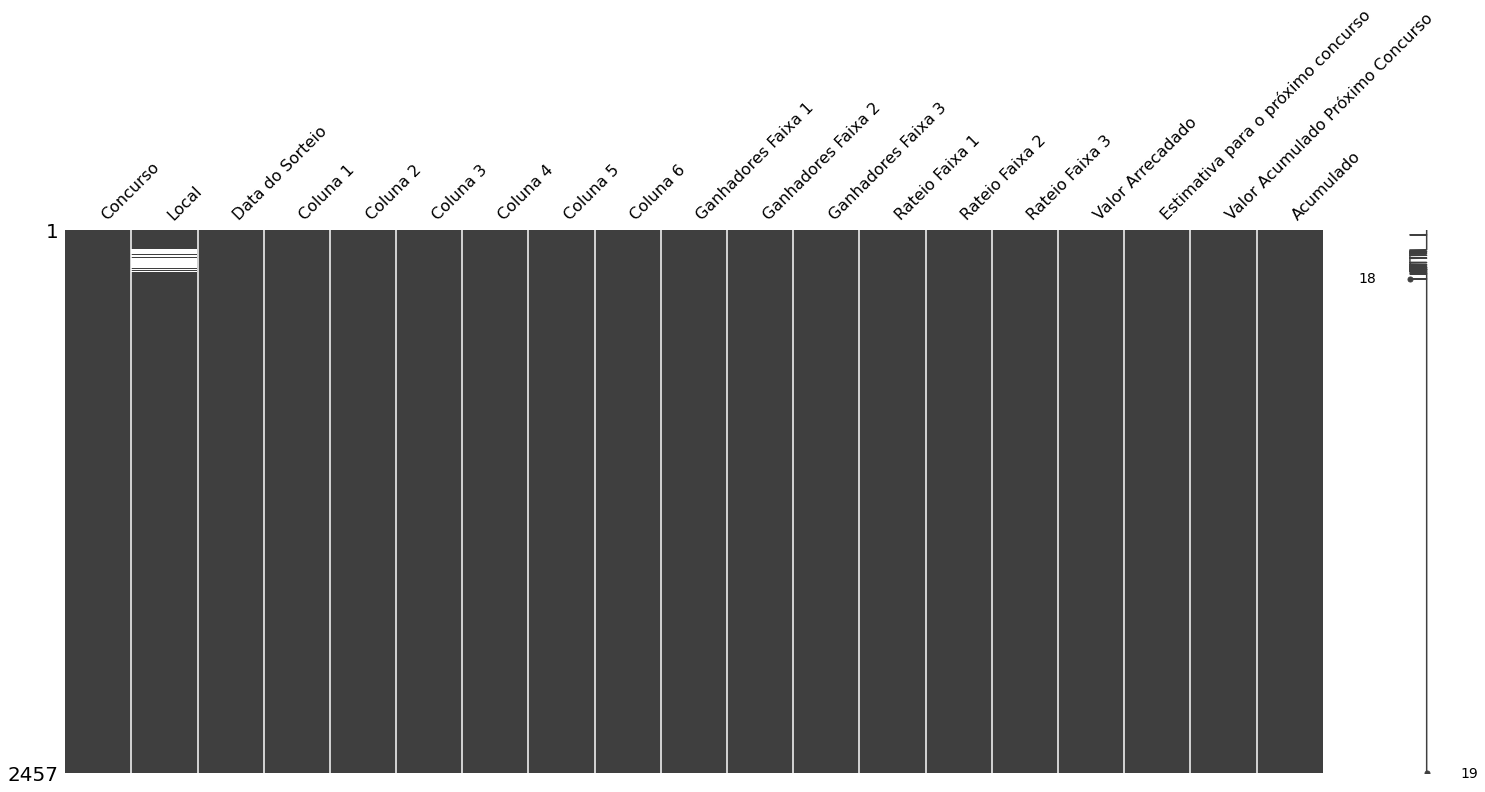

In [65]:
missingno.matrix(df)

In [38]:
# quantidade de dados ausentes na coluna do data frame
np.sum(df['Local'].isna())

265

In [39]:
# percentual de dados faltantes na coluna do data frame
round((np.mean(df['Local'].isna()))*100, ndigits=2)

10.06

In [64]:
# relalçao em percentual dos dados faltantes no dataframe
for col in df.columns:
    perc = np.mean(df[col].isna())
    print (f'{col} => {round(perc*100, ndigits=2)}%')

Concurso => 0.0%
Local => 3.62%
Data do Sorteio => 0.0%
Coluna 1 => 0.0%
Coluna 2 => 0.0%
Coluna 3 => 0.0%
Coluna 4 => 0.0%
Coluna 5 => 0.0%
Coluna 6 => 0.0%
Ganhadores Faixa 1 => 0.0%
Ganhadores Faixa 2 => 0.0%
Ganhadores Faixa 3 => 0.0%
Rateio Faixa 1 => 0.0%
Rateio Faixa 2 => 0.0%
Rateio Faixa 3 => 0.0%
Valor Arrecadado => 0.0%
Estimativa para o próximo concurso => 0.0%
Valor Acumulado Próximo Concurso => 0.0%
Acumulado => 0.0%


In [46]:
df.columns.values

array(['Concurso', 'Local', 'Data do Sorteio', 'Coluna 1', 'Coluna 2',
       'Coluna 3', 'Coluna 4', 'Coluna 5', 'Coluna 6',
       'Ganhadores Faixa 1', 'Ganhadores Faixa 2', 'Ganhadores Faixa 3',
       'Rateio Faixa 1', 'Rateio Faixa 2', 'Rateio Faixa 3', 'Cidade',
       'Unnamed: 16', 'Valor Arrecadado',
       'Estimativa para o próximo concurso',
       'Valor Acumulado Próximo Concurso', 'Acumulado',
       'Sorteio Especial', 'Observação'], dtype=object)

In [56]:
df.isnull().sum()

Concurso                              176
Local                                 265
Data do Sorteio                       176
Coluna 1                              176
Coluna 2                              176
Coluna 3                              176
Coluna 4                              176
Coluna 5                              176
Coluna 6                              176
Ganhadores Faixa 1                    176
Ganhadores Faixa 2                    176
Ganhadores Faixa 3                    176
Rateio Faixa 1                        176
Rateio Faixa 2                        176
Rateio Faixa 3                        176
Valor Arrecadado                      176
Estimativa para o próximo concurso    176
Valor Acumulado Próximo Concurso      176
Acumulado                             176
dtype: int64

In [67]:
df.Local.unique

<bound method Series.unique of 0            BrasÃ­lia, DF
1       Belo Horizonte, MG
2            BrasÃ­lia, DF
3         Santo AndrÃ©, SP
4            BrasÃ­lia, DF
               ...        
2452        SÃƒO PAULO, SP
2453        SÃƒO PAULO, SP
2454        SÃƒO PAULO, SP
2455        SÃƒO PAULO, SP
2456        SÃƒO PAULO, SP
Name: Local, Length: 2457, dtype: object>

In [68]:
df.dtypes

Concurso                                     float64
Local                                         object
Data do Sorteio                       datetime64[ns]
Coluna 1                                     float64
Coluna 2                                     float64
Coluna 3                                     float64
Coluna 4                                     float64
Coluna 5                                     float64
Coluna 6                                     float64
Ganhadores Faixa 1                           float64
Ganhadores Faixa 2                           float64
Ganhadores Faixa 3                           float64
Rateio Faixa 1                               float64
Rateio Faixa 2                               float64
Rateio Faixa 3                               float64
Valor Arrecadado                             float64
Estimativa para o próximo concurso           float64
Valor Acumulado Próximo Concurso             float64
Acumulado                                     

# Data preparation

In [98]:
# apagar campos com falta significativa de dados e também sem necessidade nesse momento
df = df.drop(['Cidade','Unnamed: 16','Sorteio Especial','Observação'],axis = 1)

In [99]:
# apagar somente as linhas 100% NAN
df = df.dropna(how='all').reset_index(drop=True)

In [101]:
df['Concurso'] = df['Concurso'].astype(int)
df['Coluna 1'] = df['Coluna 1'].astype(int)
df['Coluna 2'] = df['Coluna 2'].astype(int)
df['Coluna 3'] = df['Coluna 3'].astype(int)
df['Coluna 4'] = df['Coluna 4'].astype(int)
df['Coluna 5'] = df['Coluna 5'].astype(int)
df['Coluna 6'] = df['Coluna 6'].astype(int)
df['Ganhadores Faixa 1'] = df['Ganhadores Faixa 1'].astype(int)
df['Ganhadores Faixa 2'] = df['Ganhadores Faixa 2'].astype(int)
df['Ganhadores Faixa 3'] = df['Ganhadores Faixa 3'].astype(int)

In [120]:
# df = df.drop([
# #     'Ganhadores Faixa 2', 'Ganhadores Faixa 3',
# #        'Rateio Faixa 1',
#         'Rateio Faixa 2', 'Rateio Faixa 3',
# #               'Cidade',
# #        'Unnamed: 16',
#     'Valor Arrecadado',
# #        'Estimativa para o próximo concurso',
#        'Valor Acumulado Próximo Concurso',
# #               'Acumulado',
#        'Sorteio Especial', 'Observação'],axis = 1)

In [126]:
# df.columns = ['concurso','local','data',
#               'd1','d2','d3','d4','d5','d6',
#               'g6','g5','g4',
#               'r1',
# #               'r2', 'r3',
# #               'cidade', 'ufg',
#               'estimativa','acumulado']

In [128]:
# trabalhando com o campo data
# df['data'] = df['data'].apply(lambda _: datetime.strptime(_,"%d/%m/%Y"))
# df['data'].astype('datetime64’)
# pd.to_datetime(df.data, dayfirst=True)
# df.data = pd.to_datetime(df['data'], format='%d/%m/%Y')

In [102]:
# corrigir nomes
# df.mask(df == 'SÃƒO PAULO, SP', 'São Paulo, SP')
df.loc[df['Local'] == 'BrasÃ­lia, DF', 'Local'] = 'Brasília, DF'
df.loc[df['Local'] == 'SÃƒO PAULO, SP', 'Local'] = 'São Paulo, SP'
df.loc[df['Local'] == 'Santo AndrÃ©, SP', 'Local'] = 'Santo André, SP'
df.loc[df['Local'] == 'BRASÃLIA, DF', 'Local'] = 'Brasília, DF'
df.loc[df['Local'] == 'BRASÃLIA, DF', 'Local'] = 'Brasília, DF'
df.loc[df['Local'] == 'BRASILIA, DF', 'Local'] = 'Brasília, DF'
df.loc[df['Local'] == 'SANTA FÃ‰ DO SUL, SP', 'Local'] = 'Santa fé do Sul, SP'
df.loc[df['Local'] == 'PORTO UNIÃƒO, SC', 'Local'] = 'Porto União, SC'
df.loc[df['Local'] == 'JI-PARANÁ, RO', 'Local'] = 'JI-PARANÁ, RO'
df.loc[df['Local'] == 'SÃ£o Bento do Sul, SC', 'Local'] = 'São Bento do Sul, SC'
df.loc[df['Local'] == 'FLORIANÃ“POLIS, SC', 'Local'] = 'Florianópolis, SC'
df.loc[df['Local'] == 'BALNEÃRIO CAMBORIÃš, SC', 'Local'] = 'Balneário Camboriú, SC'
df.loc[df['Local'] == 'XANXERÃŠ, SC', 'Local'] = 'Xanxerê, SC'
df.loc[df['Local'] == 'TUBARÃƒO, SC', 'Local'] = 'Tubarão, SC'
df.loc[df['Local'] == 'RibeirÃ£o Preto, SP', 'Local'] = 'Ribeirão Preto, SP'
df.loc[df['Local'] == 'JOAÃ‡ABA, SC', 'Local'] = 'Joaçaba, SC'
df.loc[df['Local'] == 'CRICIÃšMA, SC', 'Local'] = 'Criciúma, SC'
df.loc[df['Local'] == 'CHAPECÃ“, SC', 'Local'] = 'Chapecó, SC'
df.loc[df['Local'] == 'SÃƒO JOÃƒO DA BARRA, RJ', 'Local'] = 'São João da Barra, RJ'
df.loc[df['Local'] == 'POÃ‡OS DE CALDAS, MG', 'Local'] = 'Poços de Caldas, MG'
df.loc[df['Local'] == 'MACEIÃ“, AL', 'Local'] = 'Maceió, AL'
df.loc[df['Local'] == 'RIBEIRÃƒO PRETO, SP', 'Local'] = 'Ribeirão Preto, SP'
df.loc[df['Local'] == 'ANASTÃCIO, MS', 'Local'] = 'Anastácio, MS'
df.loc[df['Local'] == 'JEQUIÃ‰, BA', 'Local'] = 'Jequié, BA'
df.loc[df['Local'] == 'CATALÃƒO, GO', 'Local'] = 'Catalão, GO'
df.loc[df['Local'] == 'APARECIDA DE GOIÃ‚NIA, GO', 'Local'] = 'Aparecida de Goiânia, GO'
df.loc[df['Local'] == 'CÃCERES, MT', 'Local'] = 'Cárceres, MT'
df.loc[df['Local'] == 'SANTO ANASTÃCIO, SP', 'Local'] = 'Santo Anastácio, SP'
df.loc[df['Local'] == 'JUNDIAÃ, SP', 'Local'] = 'Jundiaí, SP'
df.loc[df['Local'] == 'CAPÃƒO DA CANOA, RS', 'Local'] = 'Capão da Canoa, RS'
df.loc[df['Local'] == 'MACAPÃ, AP', 'Local'] = 'Macapá, AP'
df.loc[df['Local'] == 'JUAZEIRO DO NORTE, CE ', 'Local'] = 'Juazeiro do Norte, CE'
df.loc[df['Local'] == 'TRAMANDAÃ, RS', 'Local'] = 'Tramandaí, RS'
df.loc[df['Local'] == 'CAPÃƒO DA CANOA, RS', 'Local'] = 'Capão da Canoa, RS'
df.loc[df['Local'] == 'JOÃƒO PESSOA, PB', 'Local'] = 'João Pessoa, PB'
df.loc[df['Local'] == 'IMBITUVA, PR, PR', 'Local'] = 'Imbituva, PR'
df.loc[df['Local'] == 'RIBEIRÃƒO PRETO SP', 'Local'] = 'Riberião Preto, SP'
df.loc[df['Local'] == 'SÃ£o Paulo, SP', 'Local'] = 'São Paulo, SP'
df.loc[df['Local'] == 'SÃƒO JOSÃ‰ DO RIO PRETO, SP', 'Local'] = 'São José do Rio Preto, SP'
df.loc[df['Local'] == 'RIBEIRÃƒO PRETO,, SP', 'Local'] = 'Ribeirão Preto, SP'              

In [18]:
# df.cg.value_counts(normalize=False).head(60)

In [131]:
# df['accumulated'] = (df['acumulado'] == 'SIM')

In [134]:
# # reordenar colunas
# df = df [['local', 'data', 'semana',
#           'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
#           'g6', 'g5', 'g4',
#           'r1',
# #           'r2', 'r3',
# #           'cidade', 'ufg',
#           'acumulado', 'accumulated', 'estimativa']]

In [81]:
# cg = cidade ganhadora do prêmio
# df.rename(columns={'cidade':'cg'}, inplace=True)

In [138]:
# df = df.drop(['acumulado'],axis = 1)

In [139]:
# df.rename(columns={'accumulated':'acc'}, inplace=True)

In [140]:
# df['r1'] = df['r1'].str.replace(',','.').astype(float)

In [142]:
# # reordenar colunas
# df = df [['cs','ufs',
#           'data', 'semana',
#           'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
#           'g6', 'g5', 'g4',
#           'r1',
# #           'r2', 'r3',
# #           'cg', 'ufg',
# #           'acumulado',
#           'acc', 'estimativa']]

In [144]:
# df.loc[df['cg'] == 'CURITIBA', 'cg'] = 'Curitiba'
# df.loc[df['cg'] == 'SÃƒO PAULO', 'cg'] = 'São Paulo'
# df.loc[df['cg'] == 'SAO PAULO', 'cg'] = 'São Paulo'
# df.loc[df['cg'] == 'BRASÃLIA', 'cg'] = 'Brasília'
# df.loc[df['cg'] == 'BRASILIA', 'cg'] = 'Brasília'                

In [31]:
# criar uma coluna para o dia, uma coluna para o mês e uma coluna para o ano do sorteio
# df['d'] = df.data.dt.day
# df['m'] = df.data.dt.month
# df['a'] = df.data.dt.year

In [32]:
# df = df.drop(['cg'],axis = 1)
# df = df.drop(['ufg'],axis = 1)

In [105]:
# renomear campos para faciliar a visualização do dataframe
df.rename(columns={
    'Concurso':'concurso',
    'Local':'local',
    'Data do Sorteio':'data',
    'Coluna 1':'d1',
    'Coluna 2':'d2',
    'Coluna 3':'d3',
    'Coluna 4':'d4',
    'Coluna 5':'d5',
    'Coluna 6':'d6',
    'Ganhadores Faixa 1':'g1',
    'Ganhadores Faixa 2':'g2',
    'Ganhadores Faixa 3':'g3',
    'Rateio Faixa 1':'r1',
    'Rateio Faixa 2':'r2',
    'Rateio Faixa 3':'r3',
    'Valor Arrecadado':'va',
    'Estimativa para o próximo concurso':'est',
    'Valor Acumulado Próximo Concurso':'vacc',
    'Acumulado':'acc'}, inplace=True)

In [106]:
df = df.set_index('concurso')

In [107]:
# separar o nome da cidade e UF em dois campos
# cs = cidade do sorteio
# ufs = unidade federativa do sorteio
df[['cs','ufs']] = df['local'].str.split(',', expand=True)
df = df.drop(['local'],axis = 1)

In [115]:
# criar coluna 'semana' no dataframe indicando dia da semana
# do sorteio
semana = {
'Sunday':'Dom',
'Monday':'Seg',
'Tuesday':'Ter',
'Wednesday':'Qua',
'Thursday':'Qui',
'Friday':'Sex',
'Saturday':'Sáb'
}
df ['semana'] = df['data'].dt.day_name().replace(semana) 

In [118]:
# REOORDENAR as colunas
# df = df.reindex(columns=['data','cs','ufs','d1',
#                          'd2','d3','d4','d5','d6',
#                          'g1','g2','g3',
#                         'r1','r2','r3',
#                          'va','est','vacc','acc'])
df = df [['data','semana',
        'cs','ufs',
        'd1','d2','d3','d4','d5','d6',
        'g1','g2','g3',
        'r1','r2','r3',
        'va','est','vacc','acc']]

In [127]:
# formatação dos campos de número real (float)
pd.options.display.float_format = "{:,.2f}".format #formatar data frame

# data search

In [128]:
# df.query('estimativa > 200000000') #pesquisar por valor acumulado
# df.loc[[241,242]] #pesquisar pelo número do concurso
# df.iloc[2354:2355] #pesquisar pelo número da linha do data frame
# df[df['local'].str.contains(', SP')].nlargest(15, 'g6') #pesquisar por parte da string
# df[df['cidade'].str.contains('SP')].nlargest(15, 'g6') #pesquisar por parte da string
# df.groupby(pd.Grouper(key='data',freq='Y')).sum() # agrupando por data
# df.loc[1]['accumulated']
# df.iloc[0][11]
# df.loc[df['accumulated']==True] #pesquisar pela data do concurso
# df.tail(5)
# df.sort_values(by='estimativa',ascending = False) #filtrar e ordenar com critério
# df.sort_values(by='estimativa', ascending = False)[:5]
# df[df['local'].duplicated()]
# df.loc[df['data']=='2022-01-22'] #pesquisar pela data do concurso
# dfdate = pd.DataFrame(pd.date_range('2000-01-01','2020-01-01'), columns=['date'])
# df[df['data'].dt.year == 2022] # filtrando utilizando o ano do campo data
# df[df['data'].dt.month == 12] # filtrando utilizando o mês do campo data
# df[(df['data'].dt.day == 31)&(df['data'].dt.month == 12)] # filtra dia+mês
# df[df['data'].between('2021-01-01','2021-12-31')]
# df[~df['data'].dt.day_name().isin(['Saturday','Sunday'])] # filtrando somente dias úteis
# df[df['data'] >= pd.to_datetime('today').date() - pd.DateOffset(months=12, day=1)] # 12 meses atrás
# df.nlargest(12, 'g6') # filtrar pelo maior valor da coluna
# df.nlargest(12, 'g6')
# df.nsmallest(12, 'g6') # os menores valores da coluna
# df.uf.value_counts() #número de sorteios por unidade federativa
# df.semana.value_counts()
# df.loc[df['g6']>=0 & ] #listar pelo número de acertadores 6 dezenas
# df[df['uf'].str.contains('PB')].nlargest(3, 'g6') #pesquisar por parte da string
# df['uf'].unique()
# df.estimativa.mean()
# df.groupby(['uf','cidade','g6']).sum()
# df.tail()
# df[:15]
# df.loc[2445:,'ufs':'r1'] #selecionar o intervalo de colunas específicas loc[linha:coluna]
# df.iloc[-5:,0:14] #selecionar o intervalo de colunas específicas iloc[linha:coluna]

# df[df['cs']=='Belo Horizonte'].iloc[:,1:10] --ok
# df.iloc[0,0] --ok
# df.loc[1:3,'cs':'semana'] --ok
# df[df['cs'] == 'Belo Horizonte'] --ok

# estes estão ok!
# df.loc[(df['ufs'].str.contains('SP'))&(df['ufg'].str.contains('SP'))]
# df.loc[(df['g6']>=5) & (df['data']=='2010-09-04')]
# df.loc[(df['g6']>=5) & (df['g5']>=5000)].tail()
# df[(df['data'].dt.day == 31)&(df['data'].dt.month == 12)]
# df.loc[(df['g6']==6)].tail()
# df.tail()
# df.loc[(df['d1']>=50)]
# df.loc[2445:,'data':'a']
# df.iloc[:,1:17].tail(6)
# df[['ufs','cs','data','semana','d1', 'd2', 'd3', 'd4', 'd5', 'd6','g6','g5','g4','r1','acc','estimativa']].tail()
# df[df['cs'].str.contains('Belo Horizonte')].nlargest(1, 'g6') #pesquisar por parte da string

df.tail()

,data,semana,cs,ufs,d1,d2,d3,d4,d5,d6,g1,g2,g3,r1,r2,r3,va,est,vacc,acc
concurso,,,,,,,,,,,,,,,,,,,,
2453,2022-12-02,Sex,São Paulo,SP,10,14,15,24,34,44,0,63,3892,0.00,"35,542.46",821.89,"38,837,137.50","12,000,000.00","8,088,650.25",SIM
2454,2022-02-16,Qua,São Paulo,SP,9,14,22,24,44,47,0,49,4523,0.00,"46,328.88",717.00,"39,373,780.50","31,000,000.00","8,686,048.95",SIM
2455,2022-02-19,Sáb,São Paulo,SP,21,38,50,53,56,59,0,44,3811,0.00,"76,582.32","1,263.11","58,444,069.50","37,000,000.00","9,572,791.60",SIM
2456,2022-02-22,Ter,São Paulo,SP,28,34,40,41,52,55,0,31,2581,0.00,"81,253.19","1,394.17","43,687,921.50","40,000,000.00","10,235,646.61",SIM
2457,2022-02-24,Qui,São Paulo,SP,10,19,46,47,49,50,0,51,4414,0.00,"62,932.87","1,038.76","55,668,172.50","50,000,000.00","11,080,271.98",SIM


# data graph

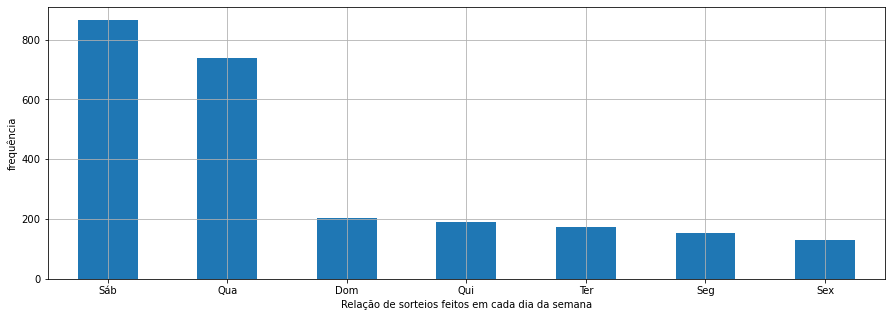

In [151]:
plt.figure(figsize=(15,5))
df['semana'].value_counts(ascending=False).plot.bar()
plt.xticks(rotation=0);
plt.xlabel('Relação de sorteios feitos em cada dia da semana')
plt.ylabel('frequência')
plt.grid();

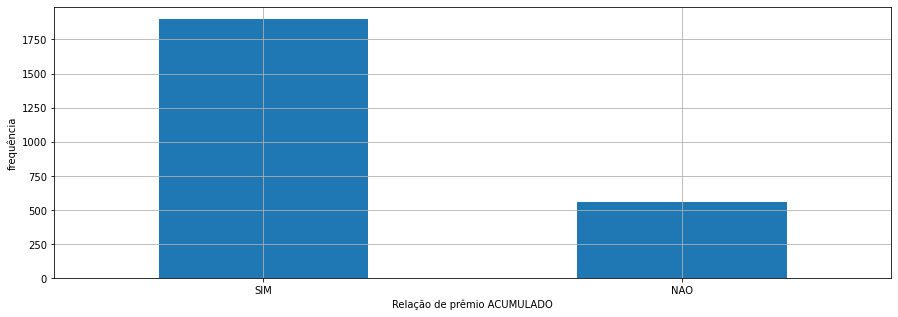

In [148]:
plt.figure(figsize=(15,5))
df['acc'].value_counts(ascending=False).plot.bar()
plt.xticks(rotation=0);
plt.xlabel('Relação de prêmio ACUMULADO')
plt.ylabel('frequência')
plt.grid();

In [123]:
df['g1'].value_counts(normalize=False).head(10)

0     1896
1      418
2       99
3       23
4       12
5        3
6        2
17       1
15       1
7        1
Name: g1, dtype: int64

In [131]:
df.isnull().sum()

data       0
semana     0
cs        89
ufs       89
d1         0
d2         0
d3         0
d4         0
d5         0
d6         0
g1         0
g2         0
g3         0
r1         0
r2         0
r3         0
va         0
est        0
vacc       0
acc        0
dtype: int64

# data analysis

In [49]:
# df = df.dropna(how='any') #apagar qualquer linhas com pelo menos um 'NAN'

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 1 to 2457
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    2457 non-null   datetime64[ns]
 1   semana  2457 non-null   object        
 2   cs      2368 non-null   object        
 3   ufs     2368 non-null   object        
 4   d1      2457 non-null   int32         
 5   d2      2457 non-null   int32         
 6   d3      2457 non-null   int32         
 7   d4      2457 non-null   int32         
 8   d5      2457 non-null   int32         
 9   d6      2457 non-null   int32         
 10  g1      2457 non-null   int32         
 11  g2      2457 non-null   int32         
 12  g3      2457 non-null   int32         
 13  r1      2457 non-null   float64       
 14  r2      2457 non-null   float64       
 15  r3      2457 non-null   float64       
 16  va      2457 non-null   float64       
 17  est     2457 non-null   float64       
 18  vacc    

In [51]:
df.ufg.value_counts(normalize=False).head(10)

SP    187
MG     77
RJ     75
PR     71
BA     35
RS     33
DF     31
ES     22
GO     19
SC     19
Name: ufg, dtype: int64

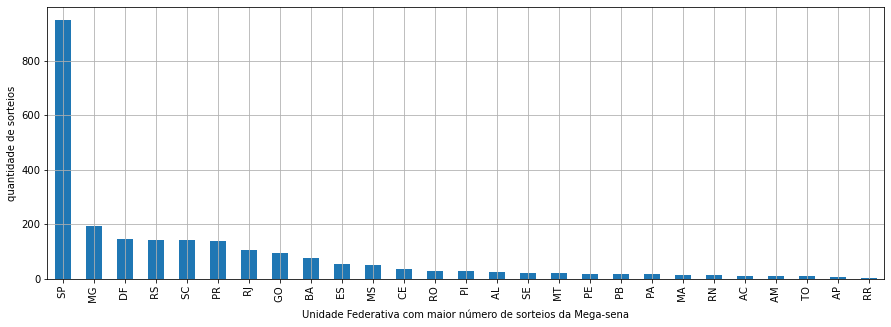

In [147]:
plt.figure(figsize=(15,5))
df['ufs'].value_counts(ascending=False).plot.bar();
plt.xlabel('Unidade Federativa com maior número de sorteios da Mega-sena')
plt.ylabel('quantidade de sorteios')
plt.grid();

In [53]:
# plt.figure(figsize=(15,5))
# sns.boxplot(df['a'], df['g6'])
# plt.title('Média de Ganhadores')
# plt.xticks(rotation=90)
# plt.locator_params(axis='y', nbins=20)
# plt.show();

In [54]:
# sns.stripplot(x='local', y='g6', data=df)
# plt.xticks(rotation=90)

In [152]:
df.ufs.value_counts(normalize=False).head(10)

 SP    949
 MG    193
 DF    145
 RS    144
 SC    143
 PR    139
 RJ    104
 GO     96
 BA     77
 ES     54
Name: ufs, dtype: int64

In [153]:
df.tail()

,data,semana,cs,ufs,d1,d2,d3,d4,d5,d6,g1,g2,g3,r1,r2,r3,va,est,vacc,acc
concurso,,,,,,,,,,,,,,,,,,,,
2453,2022-12-02,Sex,São Paulo,SP,10,14,15,24,34,44,0,63,3892,0.00,"35,542.46",821.89,"38,837,137.50","12,000,000.00","8,088,650.25",SIM
2454,2022-02-16,Qua,São Paulo,SP,9,14,22,24,44,47,0,49,4523,0.00,"46,328.88",717.00,"39,373,780.50","31,000,000.00","8,686,048.95",SIM
2455,2022-02-19,Sáb,São Paulo,SP,21,38,50,53,56,59,0,44,3811,0.00,"76,582.32","1,263.11","58,444,069.50","37,000,000.00","9,572,791.60",SIM
2456,2022-02-22,Ter,São Paulo,SP,28,34,40,41,52,55,0,31,2581,0.00,"81,253.19","1,394.17","43,687,921.50","40,000,000.00","10,235,646.61",SIM
2457,2022-02-24,Qui,São Paulo,SP,10,19,46,47,49,50,0,51,4414,0.00,"62,932.87","1,038.76","55,668,172.50","50,000,000.00","11,080,271.98",SIM


In [155]:
df.sample(3)

,data,semana,cs,ufs,d1,d2,d3,d4,d5,d6,g1,g2,g3,r1,r2,r3,va,est,vacc,acc
concurso,,,,,,,,,,,,,,,,,,,,
2266,2020-05-30,Sáb,São Paulo,SP,10,23,31,37,58,59,0,50,4167,0.00,"64,685.64","1,108.80","56,096,676.00","45,000,000.00","39,191,600.65",SIM
946,2008-02-23,Sáb,Capão da Canoa,RS,1,5,12,47,52,59,0,92,6373,0.00,"15,029.80",216.97,0.00,"16,000,000.00",0.00,SIM
824,2006-12-13,Qua,CAMPINAS,SP,6,7,9,20,33,48,0,53,5002,0.00,"14,753.39",155.73,0.00,0.00,0.00,SIM


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 1 to 2457
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    2457 non-null   datetime64[ns]
 1   semana  2457 non-null   object        
 2   cs      2368 non-null   object        
 3   ufs     2368 non-null   object        
 4   d1      2457 non-null   int32         
 5   d2      2457 non-null   int32         
 6   d3      2457 non-null   int32         
 7   d4      2457 non-null   int32         
 8   d5      2457 non-null   int32         
 9   d6      2457 non-null   int32         
 10  g1      2457 non-null   int32         
 11  g2      2457 non-null   int32         
 12  g3      2457 non-null   int32         
 13  r1      2457 non-null   float64       
 14  r2      2457 non-null   float64       
 15  r3      2457 non-null   float64       
 16  va      2457 non-null   float64       
 17  est     2457 non-null   float64       
 18  vacc    

In [159]:
dfd.columns

Index(['data', 'semana', 'cs', 'ufs', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'g1',
       'g2', 'g3', 'r1', 'r2', 'r3', 'va', 'est', 'vacc', 'acc'],
      dtype='object')

In [157]:
# dfd = df.reset_index()
dfd = df.copy()

In [160]:
dfd = dfd.drop(['data', 'semana', 'cs', 'ufs', 
                'g1', 'g2', 'g3',
                'r1', 'r2', 'r3', 'va', 'est', 'vacc', 'acc'],axis = 1)

In [161]:
# data frame para análise dos resultados
dfd.tail()

,d1,d2,d3,d4,d5,d6
concurso,,,,,,
2453,10,14,15,24,34,44
2454,9,14,22,24,44,47
2455,21,38,50,53,56,59
2456,28,34,40,41,52,55
2457,10,19,46,47,49,50


In [163]:
dfd['d1'].mode()[0]

1

In [63]:
# dfd.reset_index()

In [164]:
dfd.value_counts()

d1  d2  d3  d4  d5  d6
50  51  56  57  58  59    1
4   19  27  35  40  44    1
    21  27  29  42  47    1
        25  33  36  46    1
    20  30  41  47  58    1
                         ..
10  14  31  34  45  58    1
        26  35  36  49    1
        25  29  33  57    1
        22  41  42  53    1
1   2   3   11  28  43    1
Length: 2457, dtype: int64

In [165]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 1 to 2457
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   d1      2457 non-null   int32
 1   d2      2457 non-null   int32
 2   d3      2457 non-null   int32
 3   d4      2457 non-null   int32
 4   d5      2457 non-null   int32
 5   d6      2457 non-null   int32
dtypes: int32(6)
memory usage: 76.8 KB


In [166]:
dfd.shape

(2457, 6)

In [167]:
df[['d1','d2','d3','d4','d5','d6']].value_counts().tail()

d1  d2  d3  d4  d5  d6
10  14  31  34  45  58    1
        26  35  36  49    1
        25  29  33  57    1
        22  41  42  53    1
1   2   3   11  28  43    1
dtype: int64

In [172]:
# NÚMERO DE OCORRÊNCIAS de um número específio
x = 37
# dfd.isin([x]).sum(axis=0) # em cada coluna
dfd.isin([x]).sum(axis=0).sum() # total de eventos

266

In [173]:
dfd.loc[[2457]]

,d1,d2,d3,d4,d5,d6
concurso,,,,,,
2457,10,19,46,47,49,50


In [174]:
dfd.describe()

,d1,d2,d3,d4,d5,d6
count,"2,457.00","2,457.00","2,457.00","2,457.00","2,457.00","2,457.00"
mean,8.62,17.30,26.31,35.03,43.51,52.19
std,7.00,9.13,9.99,9.81,9.02,6.95
min,1.00,2.00,3.00,8.00,11.00,22.00
25%,3.00,10.00,19.00,28.00,38.00,49.00
50%,7.00,16.00,26.00,35.00,44.00,54.00
75%,12.00,23.00,33.00,42.00,51.00,58.00
max,50.00,51.00,56.00,58.00,59.00,60.00


In [175]:
# dataframe com a coluna da dezena e frequência
dff = {}
for i in range (60):
    dff [i+1] = dfd.isin([i+1]).sum(axis=0).sum()

In [176]:
# listar em ordem crescente cada dezena e o respectivo número de ocorrência 
for i in sorted(dff, key = dff.get, reverse=True): print (i, dff[i])

10 280
53 280
5 269
42 268
37 266
4 264
33 264
23 261
27 261
30 261
28 259
34 259
41 259
54 259
29 257
35 257
44 257
11 256
17 256
43 256
51 255
16 254
24 254
32 253
38 253
49 253
36 252
2 251
13 251
56 250
6 249
8 247
52 247
46 246
50 242
18 241
58 240
12 239
1 237
20 237
25 236
40 235
45 235
47 235
7 234
19 234
39 233
57 233
60 233
9 232
14 232
31 232
59 232
48 227
3 225
22 216
15 215
21 211
55 207
26 205


In [177]:
# biblioteca necessária para ordenar o dicionária pelo valor
from operator import itemgetter

In [183]:
# ordenar o dicionário pelo valor
print ('dezena | frequência')
for chave, valor in sorted(dff.items(), key=itemgetter(1), reverse=True):
    print ("  {}       {}".format(chave,valor))

dezena | frequência
  10       280
  53       280
  5       269
  42       268
  37       266
  4       264
  33       264
  23       261
  27       261
  30       261
  28       259
  34       259
  41       259
  54       259
  29       257
  35       257
  44       257
  11       256
  17       256
  43       256
  51       255
  16       254
  24       254
  32       253
  38       253
  49       253
  36       252
  2       251
  13       251
  56       250
  6       249
  8       247
  52       247
  46       246
  50       242
  18       241
  58       240
  12       239
  1       237
  20       237
  25       236
  40       235
  45       235
  47       235
  7       234
  19       234
  39       233
  57       233
  60       233
  9       232
  14       232
  31       232
  59       232
  48       227
  3       225
  22       216
  15       215
  21       211
  55       207
  26       205


In [186]:
# GERAR dataframe com ordem decrescente de cada dezena e o respectivo número de ocorrência
dfff = pd.DataFrame(columns=['dezena','frequência'])
for chave, valor in sorted(dff.items(), key=itemgetter(1), reverse=True):
     dfff.loc[chave] = [chave] + [valor]
dfff = dfff.reset_index()
dfff = dfff.drop(['index'],axis = 1)

In [188]:
dfff

,dezena,frequência
0,10,280
1,53,280
2,5,269
3,42,268
4,37,266
5,4,264
6,33,264
7,23,261
8,27,261
9,30,261


In [189]:
dfff.loc[38:43]

,dezena,frequência
38,1,237
39,20,237
40,25,236
41,40,235
42,45,235
43,47,235


In [190]:
dfff.loc[dfff['dezena']==10]

,dezena,frequência
0,10,280


In [196]:
print (dfff)

   dezena frequência
0      10        280
1      53        280
2       5        269
3      42        268
4      37        266
5       4        264
6      33        264
7      23        261
8      27        261
9      30        261
10     28        259
11     34        259
12     41        259
13     54        259
14     29        257
15     35        257
16     44        257
17     11        256
18     17        256
19     43        256
20     51        255
21     16        254
22     24        254
23     32        253
24     38        253
25     49        253
26     36        252
27      2        251
28     13        251
29     56        250
30      6        249
31      8        247
32     52        247
33     46        246
34     50        242
35     18        241
36     58        240
37     12        239
38      1        237
39     20        237
40     25        236
41     40        235
42     45        235
43     47        235
44      7        234
45     19        234
46     39    

In [194]:
dff.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [195]:
dff.values()

dict_values([237, 251, 225, 264, 269, 249, 234, 247, 232, 280, 256, 239, 251, 232, 215, 254, 256, 241, 234, 237, 211, 216, 261, 254, 236, 205, 261, 259, 257, 261, 232, 253, 264, 259, 257, 252, 266, 253, 233, 235, 259, 268, 256, 257, 235, 246, 235, 227, 253, 242, 255, 247, 280, 259, 207, 250, 233, 240, 232, 233])

In [201]:
d = df.d1
d.value_counts(bins=6)
d.value_counts()

1     237
2     228
4     207
3     186
5     179
6     153
7     151
8     135
10    123
9     115
11     86
12     85
13     68
14     58
15     57
17     56
16     51
18     35
20     34
19     33
23     24
21     23
22     22
25     20
24     16
26     16
28     11
27      9
29      8
31      7
30      6
33      4
32      3
35      3
43      1
34      1
36      1
38      1
46      1
41      1
39      1
50      1
Name: d1, dtype: int64

In [202]:
freq = dfd.groupby(['d1']).count() 

In [203]:
freq

,d2,d3,d4,d5,d6
d1,,,,,
1,237,237,237,237,237
2,228,228,228,228,228
3,186,186,186,186,186
4,207,207,207,207,207
5,179,179,179,179,179
6,153,153,153,153,153
7,151,151,151,151,151
8,135,135,135,135,135
9,115,115,115,115,115


In [204]:
df['d1'].value_counts(normalize=True).head(10)

1    0.10
2    0.09
4    0.08
3    0.08
5    0.07
6    0.06
7    0.06
8    0.05
10   0.05
9    0.05
Name: d1, dtype: float64

In [205]:
df['d1'].value_counts(sort=True, ascending=False).head(10)

1     237
2     228
4     207
3     186
5     179
6     153
7     151
8     135
10    123
9     115
Name: d1, dtype: int64

In [206]:
df.loc[2457]

data      2022-02-24 00:00:00
semana                    Qui
cs                  São Paulo
ufs                        SP
d1                         10
d2                         19
d3                         46
d4                         47
d5                         49
d6                         50
g1                          0
g2                         51
g3                       4414
r1                       0.00
r2                  62,932.87
r3                   1,038.76
va              55,668,172.50
est             50,000,000.00
vacc            11,080,271.98
acc                       SIM
Name: 2457, dtype: object

In [207]:
listar somente campos numericos
df.select_dtypes(include='number').tail()

,d1,d2,d3,d4,d5,d6,g1,g2,g3,r1,r2,r3,va,est,vacc
concurso,,,,,,,,,,,,,,,
2453,10,14,15,24,34,44,0,63,3892,0.00,"35,542.46",821.89,"38,837,137.50","12,000,000.00","8,088,650.25"
2454,9,14,22,24,44,47,0,49,4523,0.00,"46,328.88",717.00,"39,373,780.50","31,000,000.00","8,686,048.95"
2455,21,38,50,53,56,59,0,44,3811,0.00,"76,582.32","1,263.11","58,444,069.50","37,000,000.00","9,572,791.60"
2456,28,34,40,41,52,55,0,31,2581,0.00,"81,253.19","1,394.17","43,687,921.50","40,000,000.00","10,235,646.61"
2457,10,19,46,47,49,50,0,51,4414,0.00,"62,932.87","1,038.76","55,668,172.50","50,000,000.00","11,080,271.98"


In [211]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457],
           dtype='int64', name='concurso', length=2457)

In [212]:
df.count()

data      2457
semana    2457
cs        2368
ufs       2368
d1        2457
d2        2457
d3        2457
d4        2457
d5        2457
d6        2457
g1        2457
g2        2457
g3        2457
r1        2457
r2        2457
r3        2457
va        2457
est       2457
vacc      2457
acc       2457
dtype: int64

In [213]:
df[df['d1'] % 2 == 0]

,data,semana,cs,ufs,d1,d2,d3,d4,d5,d6,g1,g2,g3,r1,r2,r3,va,est,vacc,acc
concurso,,,,,,,,,,,,,,,,,,,,
1,1996-11-03,Dom,Brasília,DF,4,5,30,33,41,52,0,17,2016,0.00,"39,158.92",330.21,0.00,0.00,0.00,SIM
3,1996-03-25,Seg,Brasília,DF,10,11,29,30,36,47,2,62,4261,"391,192.51","10,515.93",153.01,0.00,0.00,0.00,NAO
8,1996-04-29,Seg,Brasília,DF,4,17,37,38,47,53,0,60,5262,0.00,"16,084.11",183.40,0.00,0.00,0.00,SIM
9,1996-06-05,Qua,Brasília,DF,8,43,54,55,56,60,0,17,2175,0.00,"60,043.79",469.31,0.00,0.00,0.00,SIM
10,1996-05-13,Seg,Brasília,DF,4,18,21,25,38,57,0,251,12590,0.00,"6,638.45",132.35,0.00,0.00,0.00,SIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,2022-02-02,Qua,São Paulo,SP,2,6,11,15,17,39,0,94,5633,0.00,"26,814.82",639.24,"43,718,166.00","26,000,000.00","6,184,592.04",SIM
2452,2022-09-02,Sex,São Paulo,SP,8,10,51,56,57,58,0,23,2117,0.00,"72,470.70","1,124.78","28,910,097.00","7,000,000.00","7,499,393.76",SIM
2453,2022-12-02,Sex,São Paulo,SP,10,14,15,24,34,44,0,63,3892,0.00,"35,542.46",821.89,"38,837,137.50","12,000,000.00","8,088,650.25",SIM


In [214]:
df.columns.values

array(['data', 'semana', 'cs', 'ufs', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
       'g1', 'g2', 'g3', 'r1', 'r2', 'r3', 'va', 'est', 'vacc', 'acc'],
      dtype=object)

In [215]:
df['acc'].size

2457

# Script

In [216]:
# GERAR BILHETES DE PALPITE DE JOGO PARA A MEGA-SENA
# by geanclm in 15/05/2021 19:20h

# importar bibliotecas necessárias
import random, time
from datetime import datetime
from pytz import timezone
from numpy.random import default_rng

In [217]:
# registro_data_e_hora_completo = time.ctime()
hoje = datetime.now()
fuso_horario = timezone("America/Sao_Paulo")
data_e_hora = hoje.astimezone(fuso_horario)
agora = data_e_hora.strftime("%d/%m/%Y %H:%M"+"h")

In [218]:
bilhete = int(input("Quantos volantes deseja apostar?: "))
i = 0
while i < bilhete:
    print (f'''
    PALPITE {i+1}:\nVOLANTE PARA A MEGA SENA''')  
    print (sorted((random.sample(range(1,60),6))))
    i = i + 1
    time.sleep (1)
print ('\n')  
print (f'''{bilhete} bilhete(s) gerado(s) em {agora}\nBOA SORTE!''')

Quantos volantes deseja apostar?: 3

    PALPITE 1:
VOLANTE PARA A MEGA SENA
[16, 27, 28, 30, 37, 40]

    PALPITE 2:
VOLANTE PARA A MEGA SENA
[2, 15, 19, 22, 27, 50]

    PALPITE 3:
VOLANTE PARA A MEGA SENA
[7, 8, 17, 27, 41, 52]


3 bilhete(s) gerado(s) em 26/02/2022 10:04h
BOA SORTE!
